# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [29]:
#Type your code here
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [30]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
df = pd.read_csv("data_clustering_inverse.csv")

In [31]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupCat,BalanceGroupCat,AgeGroupEncoded,BalanceGroupEncoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.000000,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,"(66.0, 70.0]","(4678.708, 5823.073]",10,4,2
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.000000,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,"(66.0, 70.0]","(12689.261, 13833.625]",10,11,0
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.000000,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,"(17.999, 23.0]","(101.249, 1245.615]",0,0,1
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.000000,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,"(23.0, 28.0]","(8111.802, 9256.167]",1,7,0
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,44.678444,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,"(42.0, 47.0]","(6967.438, 8111.802]",5,6,0


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [32]:
df.drop(columns=['TransactionDate', 'PreviousTransactionDate'])
cat_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()

encoders = {}
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupCat,BalanceGroupCat,AgeGroupEncoded,BalanceGroupEncoded,Target
0,14.09,680,1,36,0,70.000000,0,81.0,1.0,5112.21,105,10,8,10,4,2
1,376.24,1178,1,15,0,68.000000,0,141.0,1.0,13758.91,192,10,4,10,11,0
2,126.29,1262,1,23,2,19.000000,3,56.0,1.0,1122.35,41,0,0,0,0,1
3,184.50,818,1,33,2,26.000000,3,25.0,1.0,8569.06,163,1,11,1,7,0
4,13.45,1939,0,1,2,44.678444,3,198.0,1.0,7429.40,16,5,10,5,6,0


In [33]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
x = df.drop(columns=['Target'])
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [34]:
# Buatlah model klasifikasi menggunakan Decision Tree
model = DecisionTreeClassifier(random_state=42)
decision_tree_model = model.fit(x_train, y_train)

               Accuracy    Recall  Precision  F1-Score
Decision Tree  0.988072  0.987346   0.986722  0.987015


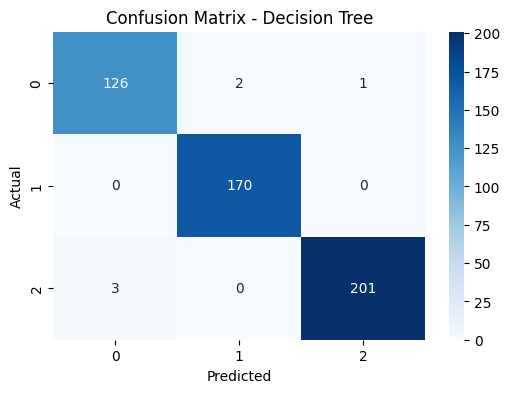

In [35]:
# Menampilkan hasil evaluasi dari model Decision Tree
# Prediksi
y_pred = decision_tree_model.predict(x_test)

# Hitung metrik
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred, average='macro'),
    'Precision': precision_score(y_test, y_pred, average='macro'),
    'F1-Score': f1_score(y_test, y_pred, average='macro')
}

# Tampilkan metrik sebagai DataFrame biar rapi
metrics_df = pd.DataFrame(metrics, index=['Decision Tree'])
print(metrics_df)

# hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=decision_tree_model.classes_,
            yticklabels=decision_tree_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [36]:
# Menyimpan Model
joblib.dump(model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [37]:
# Buatlah model klasifikasi menggunakan Decision Tree
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
knn_model = KNeighborsClassifier()
xgb_model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)

models = {
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model,
    "KNN": knn_model,
    "XGBoost": xgb_model
}

metrics_list = []

# Latih tiap model dan evaluasi sekaligus
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    metrics_list.append({
        "Model": name,
        "Accuracy": acc,
        "Recall": rec,
        "Precision": prec,
        "F1-Score": f1
    })

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:20:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


               Accuracy    Recall  Precision  F1-Score
Model                                                 
Decision Tree  0.988072  0.987346   0.986722  0.987015
Random Forest  1.000000  1.000000   1.000000  1.000000
SVM            0.751491  0.767183   0.759383  0.762644
KNN            0.705765  0.723514   0.715706  0.718514
XGBoost        0.992048  0.991860   0.991620  0.991722


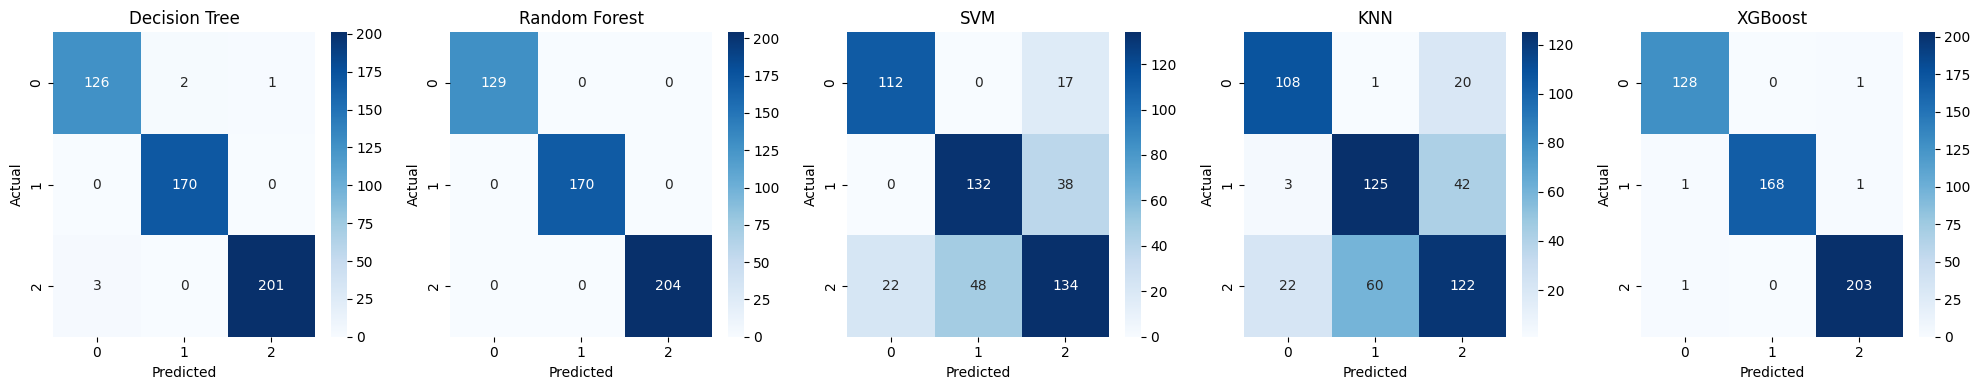

In [38]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
metrics_df = pd.DataFrame(metrics_list).set_index("Model")
print(metrics_df)

fig, axes = plt.subplots(1, len(models), figsize=(20, 4))

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=model.classes_, yticklabels=model.classes_, ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [39]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
joblib.dump(random_forest_model, 'explore_Random Forest_classification.h5')
joblib.dump(svm_model, 'explore_SVM_classification.h5')
joblib.dump(knn_model, 'explore_KNN_classification.h5')
joblib.dump(xgb_model, 'explore_XGBoost_classification.h5')

['explore_XGBoost_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [40]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
param_space = {
    'n_neighbors': Integer(1, 50),
    'weights': Categorical(['uniform', 'distance']),
    'p': Integer(1, 2)  # 1 = Manhattan, 2 = Euclidean
}

knn_model = KNeighborsClassifier()

# Menggunakan metode bayesian optimazation
bayesOpt = BayesSearchCV(
    estimator=knn_model,
    search_spaces=param_space,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42
)

bayesOpt.fit(x_train, y_train)

# Ambil model terbaik
best_knn = bayesOpt.best_estimator_

In [41]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
y_pred = best_knn.predict(x_test)
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "F1-Score": f1_score(y_test, y_pred, average='macro')
}

print("Best Parameters:", bayesOpt.best_params_)
print(pd.DataFrame([metrics], index=["KNN (Bayes Opt)"]))

Best Parameters: OrderedDict({'n_neighbors': 14, 'p': 1, 'weights': 'distance'})
                 Accuracy    Recall  Precision  F1-Score
KNN (Bayes Opt)  0.779324  0.792286   0.784815  0.788177


In [42]:
# Menyimpan Model hasil tuning
joblib.dump(best_knn, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code